In [1]:
import tensorflow as tf
from keras.backend import tensorflow_backend

gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=.30)
sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))
tensorflow_backend.set_session(sess)


Using TensorFlow backend.
C:\Users\myersadmin\AppData\Roaming\Python\Python35\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [148]:
# loading net
import json

modelName= "model_detection_enc_dec_5"
with open('../resources/'+modelName+"_json", 'r') as infile:
    json_string_loaded = json.load(infile)

In [149]:
# laoding
from keras.models import model_from_json
modelLoaded = model_from_json(json_string_loaded)

In [150]:
# loading weights
modelLoaded.load_weights('../resources/'+modelName+'_weights.h5')

In [151]:
%load_ext autoreload
%aimport qualityMeasure

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [21]:
# DCTS profiles

from qualityMeasure import *
pathToHighQualityDataset = "../resources/img/nice_full_wing/B=0/T=0/"

In [11]:


profsDCTS = []
profsDCTSNoZero=[]
profsVar = []


for i in range(24):
    profsDCTS.append(getDCTSProfile(readTile(pathToDataset=pathToHighQualityDataset,tileNum=i,channelNum=3)))
    profsVar.append(getVarianceProfile(readTile(pathToDataset=pathToHighQualityDataset,tileNum=i,channelNum=3)))
    profsDCTSNoZero.append(getDCTSProfileNoZero(readTile(pathToDataset=pathToHighQualityDataset,tileNum=i,channelNum=3)))
profsDCTS = np.array(profsDCTS)
profsVar = np.array(profsVar)
profsDCTSNoZero = np.array(profsDCTSNoZero)

In [179]:
# network profile

profsNet = []
for i in range(24):
    profsNet.append(qualityMeasure.getNetworkProfile(readTile(pathToDataset=pathToHighQualityDataset,tileNum=i,channelNum=3), modelLoaded))
profsNet = np.array(profsNet)

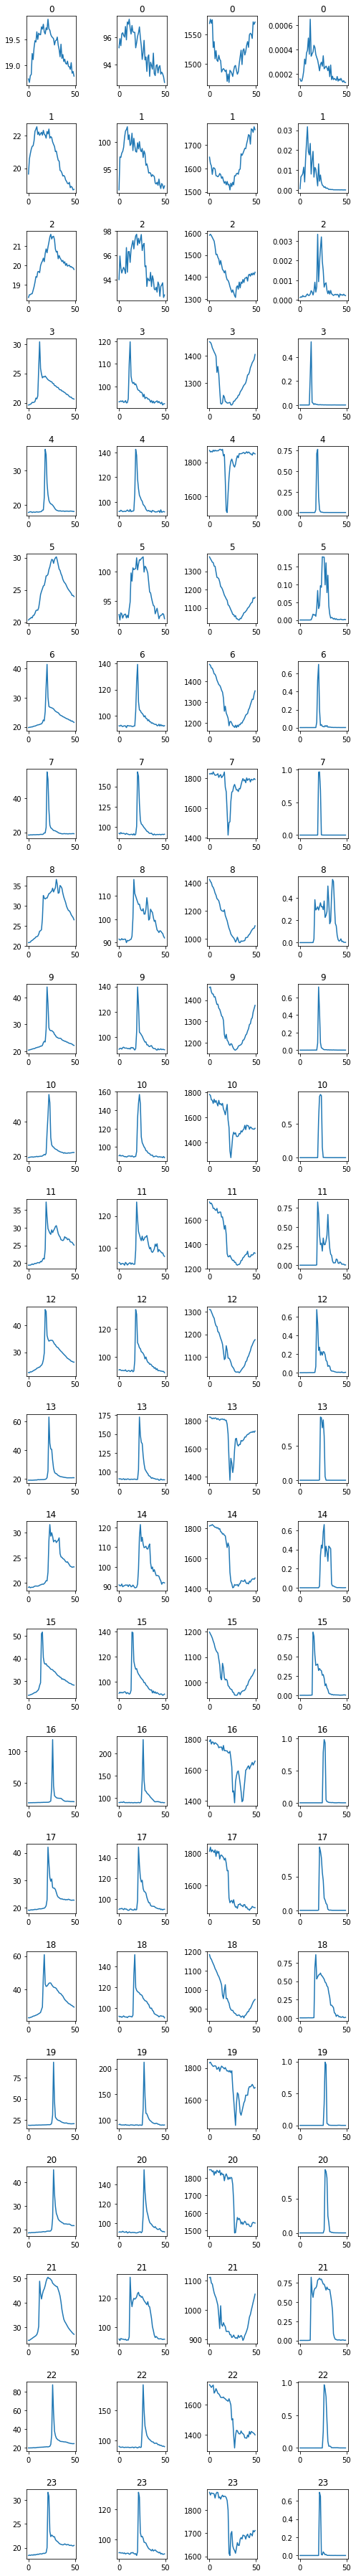

In [180]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 40,20
profiles = np.array([profsVar, profsDCTS, profsDCTSNoZero, profsNet])
plotProfiles(profiles)

In [124]:
tile = (readTile(pathToDataset=pathToHighQualityDataset,tileNum=23,channelNum=3))

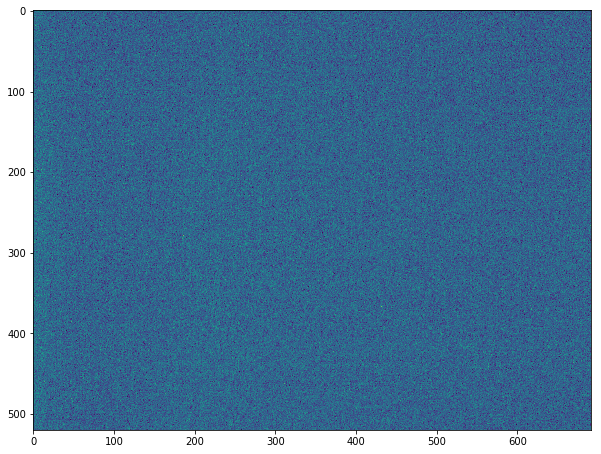

In [154]:
plt.rcParams['figure.figsize'] = 10,10
plt.imshow(qualityMeasure.normalizeWithLimits(tile[15,:,:]))

In [177]:
inp_tensor = qualityMeasure.normalizeWithLimits((tile[29,:,:])[np.newaxis, ..., np.newaxis])
prediction = modelLoaded.predict(inp_tensor)

(<matplotlib.image.AxesImage at 0x63165080>,
 <matplotlib.colorbar.Colorbar at 0x63311978>)

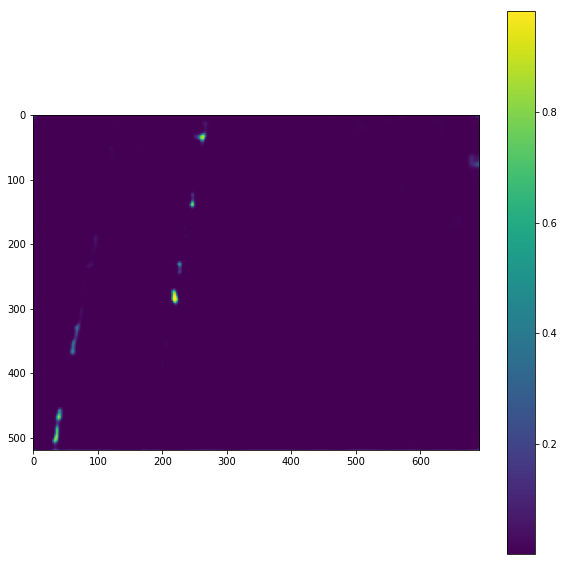

In [178]:
plt.imshow(prediction[0,:,:,0]), plt.colorbar()

In [31]:
from importlib import reload
reload(qualityMeasure)

pr = qualityMeasure.getNetworkMeasure(tile[0,:,:], modelLoaded)

TypeError: Invalid dimensions for image data

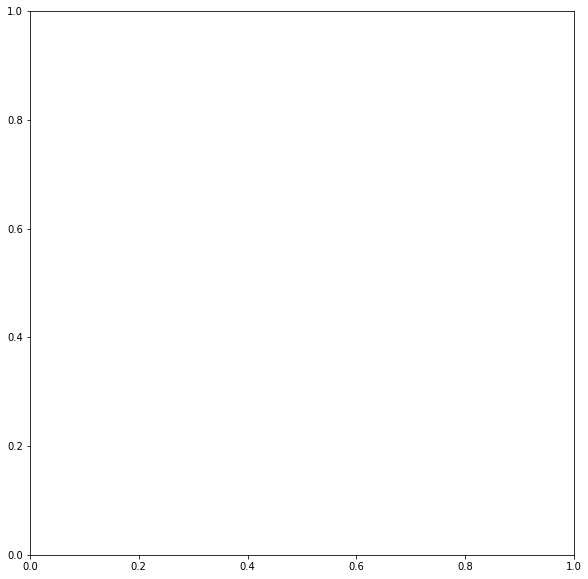

In [32]:
plt.imshow(pr)

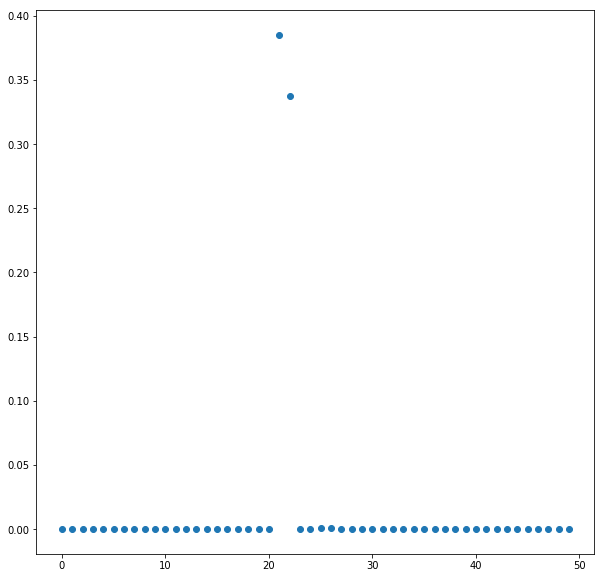

In [128]:
plt.plot(profsNet[23], 'o')